Talller 2

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Punto 1

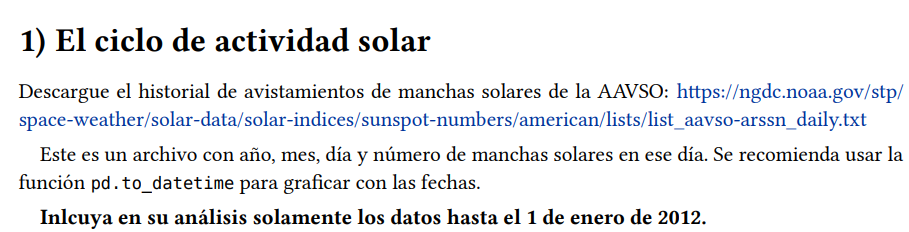

In [24]:
datos=pd.read_fwf('Datos_punto1.txt',names=['Year','Month','Day','SSN']).drop(0)
datos['Fecha']=pd.to_datetime(datos[['Year', 'Month', 'Day']])
datos=datos[datos['Fecha']<='2012-01-01']
datos

,Year,Month,Day,SSN,Fecha
1,1945,1,1,10.0,1945-01-01
2,1945,1,2,0.0,1945-01-02
3,1945,1,3,1.0,1945-01-03
4,1945,1,4,2.0,1945-01-04
5,1945,1,5,11.0,1945-01-05
...,...,...,...,...,...
24468,2011,12,28,62.0,2011-12-28
24469,2011,12,29,67.0,2011-12-29
24470,2011,12,30,58.0,2011-12-30
24471,2011,12,31,55.0,2011-12-31


1.1 Período del ciclo solar
\
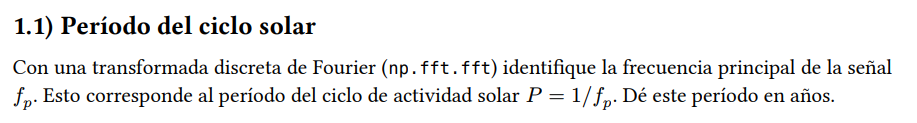


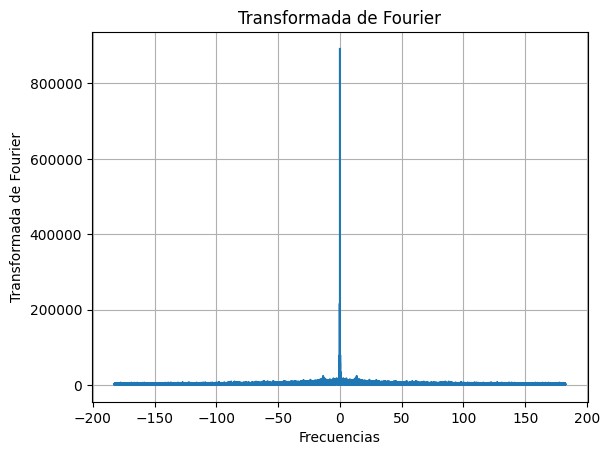

Frecuencia Principal 0.07457502451781628
Periodo del ciclo Solar 13.40931506849315


In [25]:
fourier=np.abs(np.fft.fft(datos['SSN']))
frecuencias=np.fft.fftfreq(len(fourier),d=1/365)
plt.plot(frecuencias,fourier)
plt.xlabel("Frecuencias")
plt.ylabel("Transformada de Fourier")
plt.title("Transformada de Fourier")
plt.grid()
plt.show()
frecuencia_principal=frecuencias[np.argmax(fourier[1:])]
print('Frecuencia Principal',frecuencia_principal)
Periodo_ciclo_solar=1/frecuencia_principal
print('Periodo del ciclo Solar',Periodo_ciclo_solar)

1.2) Reduccion de ruido
\
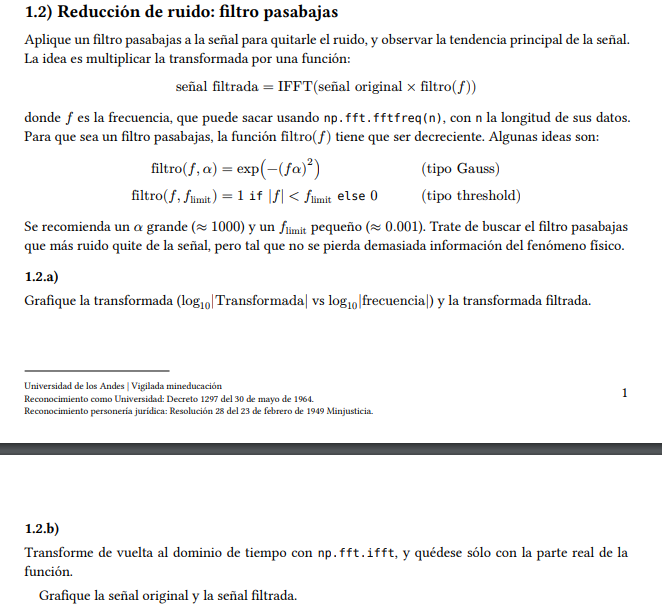